In [1]:
#Amy Nestingen
#DSC 530 Final Project


#imports
import pandas as pd
import thinkstats2
import thinkplot
import numpy as np
import math

In [2]:
#read in data
%pwd
NYC_Data = pd.read_csv('New_York_NY_listing.csv')
NYC_Data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,10,48,11/4/2019,0.39,1,1
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,295,11/22/2019,4.67,1,1
2,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,10/13/2019,0.60,1,19
3,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,49,10/5/2017,0.38,1,365
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,454,11/21/2019,3.52,1,242


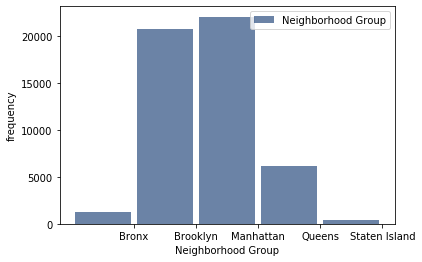

<Figure size 576x432 with 0 Axes>

In [3]:
#Histogram of each variable being investigated

#Neighborhood Group: This is which New York City borough the Airbnb resides
Hist_Neigh_Grp= thinkstats2.Hist(NYC_Data.neighbourhood_group, label='Neighborhood Group') 
thinkplot.Hist(Hist_Neigh_Grp) 
thinkplot.Show(xlabel='Neighborhood Group', ylabel='frequency')

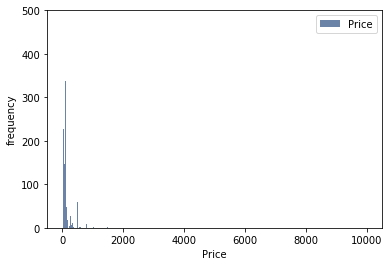

<Figure size 576x432 with 0 Axes>

In [4]:
#Price: Price per night
Hist_Price= thinkstats2.Hist(NYC_Data.price, label='Price') 
thinkplot.Hist(Hist_Price) 
thinkplot.Show(xlabel='Price', ylabel='frequency',ylim = [0,500])


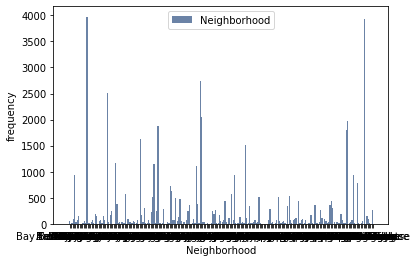

<Figure size 576x432 with 0 Axes>

In [5]:
#Neighborhood: The specific neighborhod of the Airbnb
Hist_Neigh= thinkstats2.Hist(NYC_Data.neighbourhood, label='Neighborhood') 
thinkplot.Hist(Hist_Neigh) 
thinkplot.Show(xlabel='Neighborhood', ylabel='frequency')

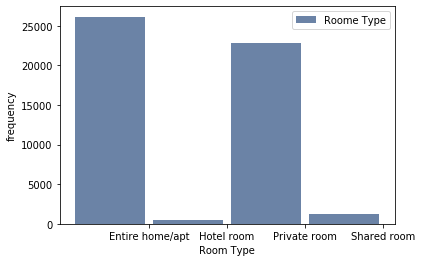

<Figure size 576x432 with 0 Axes>

In [6]:
#Room_Type: Includes room types Entire home/apt, Hotel Room, Private Room, and Shared Room. 
Hist_Rm_Typ= thinkstats2.Hist(NYC_Data.room_type, label='Roome Type') 
thinkplot.Hist(Hist_Rm_Typ) 
thinkplot.Show(xlabel='Room Type', ylabel='frequency')

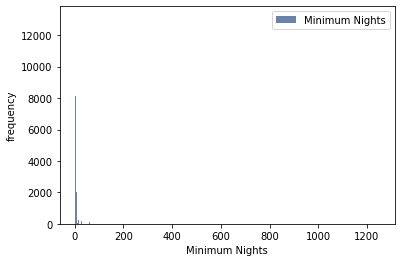

<Figure size 576x432 with 0 Axes>

In [7]:
#Minimum_nights: What is the minimum of nights a guest can stay
Hist_Min_Nght= thinkstats2.Hist(NYC_Data.minimum_nights, label='Minimum Nights') 
thinkplot.Hist(Hist_Min_Nght) 
thinkplot.Show(xlabel='Minimum Nights', ylabel='frequency')

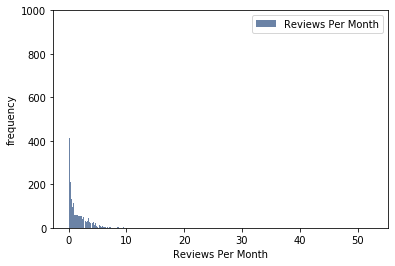

<Figure size 576x432 with 0 Axes>

In [8]:
#Reviews_per_month: How many reviews does the Airbnb get per month
Hist_RPM= thinkstats2.Hist(NYC_Data.reviews_per_month, label='Reviews Per Month') 
thinkplot.Hist(Hist_RPM) 
thinkplot.Show(xlabel='Reviews Per Month', ylabel='frequency', ylim=[0,1000])

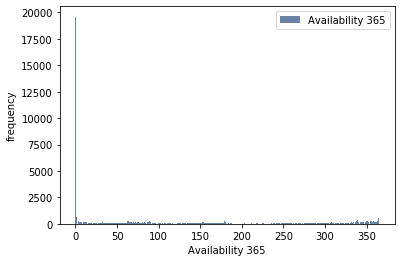

<Figure size 576x432 with 0 Axes>

In [9]:
#Availability_365: How many days out of the year is the Airbnb available 
Hist_Avl= thinkstats2.Hist(NYC_Data.availability_365, label='Availability 365') 
thinkplot.Hist(Hist_Avl) 
thinkplot.Show(xlabel='Availability 365', ylabel='frequency')

In [10]:
# There is an outlier in minimum nights. It is not plausible that the minimum night stay is 1250 nights. This data point will be excluded. 
#I also want to take out the data points that have availability 365 = 0. If the Airbnb is never available, it should not be included. 
#There's a long right tail for the Price varible. I decided to only include prices less than 500 and greater than 0.

print('NYC_Data Max Minimum Night Stay: ', max(NYC_Data.minimum_nights))

print('Price Mean: ',NYC_Data.price.mean())

count_row = NYC_Data.shape[0]
print ('NYC_Data Row Count: ',count_row)

NYC_DC = NYC_Data[NYC_Data.minimum_nights < 50] 
NYC_DC = NYC_DC[NYC_DC.availability_365 >0] 
NYC_DC = NYC_DC[NYC_DC.price >0] 
NYC_DC = NYC_DC[NYC_DC.price <500] 

print('NYC_DC Max Minimum Night Stay: ', max(NYC_DC.minimum_nights))

print('Price Mean: ',NYC_DC.price.mean())

count_row = NYC_DC.shape[0]
print ('NYC_DC Row Count: ',count_row)


NYC_Data Max Minimum Night Stay:  1250
Price Mean:  158.17178205102869
NYC_Data Row Count:  50599
NYC_DC Max Minimum Night Stay:  45
Price Mean:  135.0922852885397
NYC_DC Row Count:  29528


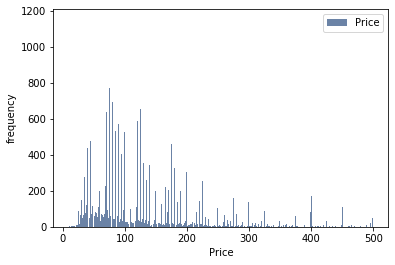

Price Mean:  135.0922852885397
Price Variance:  7903.898043234911
Price Std. Deviation:  88.90386967525605
Price Max:  499


<Figure size 576x432 with 0 Axes>

In [11]:
#New Histogram of Price
Hist_Price= thinkstats2.Hist(NYC_DC.price, label='Price') 
thinkplot.Hist(Hist_Price) 
thinkplot.Show(xlabel='Price', ylabel='frequency')

#Other Descriptive Characteristics
print('Price Mean: ',NYC_DC.price.mean())
print('Price Variance: ',NYC_DC.price.var())
print('Price Std. Deviation: ',NYC_DC.price.std())
print('Price Max: ',NYC_DC.price.max())

# There is generally one mode around $75/night. There are peaks at each number divisible by 10. 
# The strong outliers have been removed. 
# The right tail is still very long.  

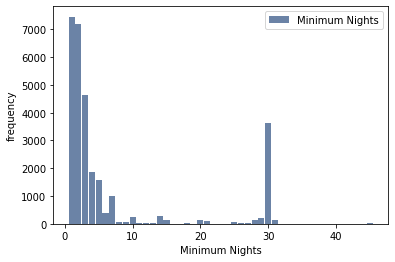

Min_Nights Mean:  6.93182741804389
Min_Nights Variance:  98.44263787693474
Min_Nights Std. Deviation:  9.92182633777344


<Figure size 576x432 with 0 Axes>

In [12]:
#New Histogram of minimum nights
Hist_Min_Nght= thinkstats2.Hist(NYC_DC.minimum_nights, label='Minimum Nights') 
thinkplot.Hist(Hist_Min_Nght) 
thinkplot.Show(xlabel='Minimum Nights', ylabel='frequency')

#Other Descriptive Characteristics
print('Min_Nights Mean: ',NYC_DC.minimum_nights.mean())
print('Min_Nights Variance: ',NYC_DC.minimum_nights.var())
print('Min_Nights Std. Deviation: ',NYC_DC.minimum_nights.std())

# There are two modes are 1 and 30. This makes me believe that some Airbnbs are rented by the month.
# There looks to be on outlier at around 45 nights. 
# The tails are very long for the variable. 

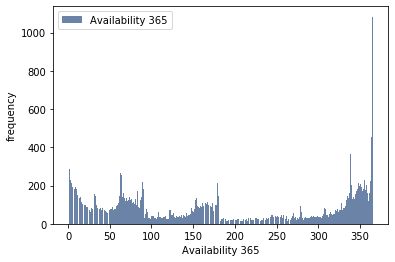

Available Nights Mean:  181.5357965321051
Available Nights Variance:  16978.90670108993
Available Nights Std. Deviation:  130.3031338882144


<Figure size 576x432 with 0 Axes>

In [13]:
#New Histogram of Availability 365
Hist_Avl= thinkstats2.Hist(NYC_DC.availability_365, label='Availability 365') 
thinkplot.Hist(Hist_Avl) 
thinkplot.Show(xlabel='Availability 365', ylabel='frequency')

#Other Descriptive Characteristics
print('Available Nights Mean: ',NYC_DC.availability_365.mean())
print('Available Nights Variance: ',NYC_DC.availability_365.var())
print('Available Nights Std. Deviation: ',NYC_DC.availability_365.std())

# The most is the max value at 365. 
# The tail is very long and has slight peaks but I wouldn't call this bimodal. 
# There are no outliers for this varialbe.  

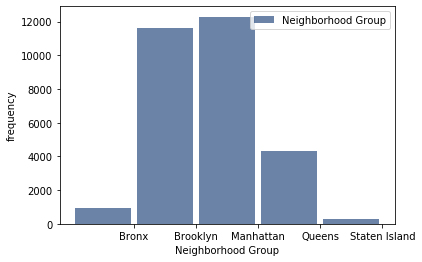

<Figure size 576x432 with 0 Axes>

In [14]:
#New Neighborhood Group Histogram
Hist_Neigh_Grp= thinkstats2.Hist(NYC_DC.neighbourhood_group, label='Neighborhood Group') 
thinkplot.Hist(Hist_Neigh_Grp) 
thinkplot.Show(xlabel='Neighborhood Group', ylabel='frequency')

#Other Descriptive Characteristics
# There are considerably more airbnb in Brooklyn and Manhattan compared to Queens, Staten Island, and the Bronx. 
# There is still enough data in all bouroughs to be included in the analysis.
# There are no outliers
# This data is nominal so there are no tails. 

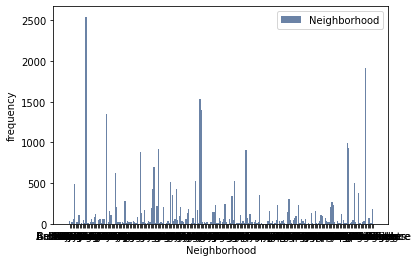

<Figure size 576x432 with 0 Axes>

In [15]:
#New Neighborhood Histogram
Hist_Neigh= thinkstats2.Hist(NYC_DC.neighbourhood, label='Neighborhood') 
thinkplot.Hist(Hist_Neigh) 
thinkplot.Show(xlabel='Neighborhood', ylabel='frequency')

#Other Descriptive Characteristics
# There are many neighborhoods listed. I believe the peaks in this variable will corespond to the peaks in the Neighborhood group data set. 
# There are no outliers
# This data is nominal so there are no tails. 

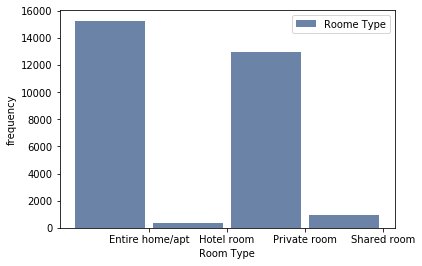

<Figure size 576x432 with 0 Axes>

In [16]:
#New Room_Type Histogram
Hist_Rm_Typ= thinkstats2.Hist(NYC_DC.room_type, label='Roome Type') 
thinkplot.Hist(Hist_Rm_Typ) 
thinkplot.Show(xlabel='Room Type', ylabel='frequency')

#Other Descriptive Characteristics
# There are considerably more airbnbs with a room type of Entire Home/Apt or Private room. 
# As this analysis goes on, I will decide if it makes sense to include room types of Hotel Room and Shared Room. 
# There might be outliers in room type as hotel room and shared room. 
# This data is nominal so there are no tails. 

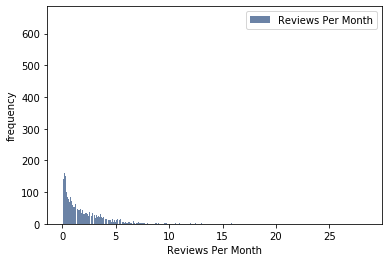

Reviews Per Month Mean:  1.8411702299314336
Reviews Per Month Variance:  3.121465623931245
Reviews Per Month Std. Deviation:  1.766766997634732


<Figure size 576x432 with 0 Axes>

In [17]:
#New Reviews_per_month Histogram
Hist_RPM= thinkstats2.Hist(NYC_DC.reviews_per_month, label='Reviews Per Month') 
thinkplot.Hist(Hist_RPM) 
thinkplot.Show(xlabel='Reviews Per Month', ylabel='frequency')

#Other Descriptive Characteristics
print('Reviews Per Month Mean: ',NYC_DC.reviews_per_month.mean())
print('Reviews Per Month Variance: ',NYC_DC.reviews_per_month.var())
print('Reviews Per Month Std. Deviation: ',NYC_DC.reviews_per_month.std())

# The mode is around 0-1 review per month.
# There is a strong right skew. 
# There are possible outliers on the end of the right tail 

In [18]:
#PMF to Compare Cost based on Neighborhood Group of Manhattan or Brooklyn

# Create data sets
MHN = NYC_DC[NYC_DC.neighbourhood_group == "Manhattan"]

BRK = NYC_DC[NYC_DC.neighbourhood_group == "Brooklyn"]

In [19]:
def MakeFigures(MHN, BRK):
    # plot the PMFs
    MHN_pmf = thinkstats2.Pmf(MHN.price, label='MHN')
    BRK_pmf = thinkstats2.Pmf(BRK.price, label='BRK')
    width = 0.45

    thinkplot.PrePlot(2, cols=2)
    thinkplot.Hist(MHN_pmf, align='right', width=width)
    thinkplot.Hist(BRK_pmf, align='left', width=width)
    thinkplot.Config(xlabel='Prices',
                     ylabel='probability',
                     axis=[0, 500, 0, 0.05])

    thinkplot.PrePlot(2)
    thinkplot.SubPlot(2)
    thinkplot.Pmfs([MHN_pmf, BRK_pmf])
    thinkplot.Show(root='probability_Airbnb_pmf',
                   xlabel='Prices',
                   axis=[0, 500, 0, 0.05])

    # plot the differences in the PMFs
    prices = range(0, 500)
    diffs = []
    for price in prices:
        p1 = MHN_pmf.Prob(price)
        p2 = BRK_pmf.Prob(price)
        diff = 100 * (p1 - p2)
        diffs.append(diff)

    thinkplot.Bar(prices, diffs)
    thinkplot.Show(root='probability_price_diffs',
                   title='Difference in PMFs',
                   xlabel='price',
                   ylabel='percentage points',
                   legend=True)

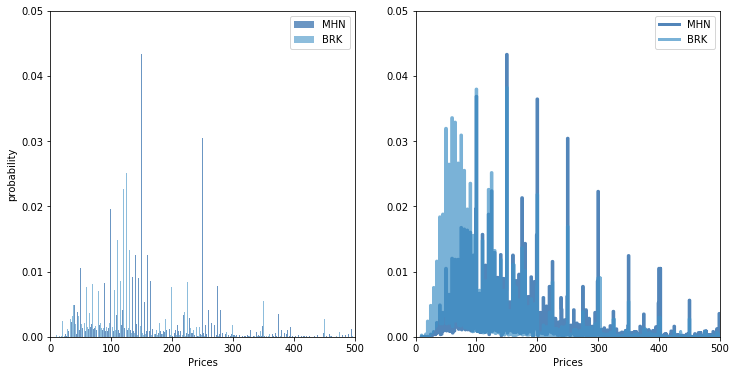

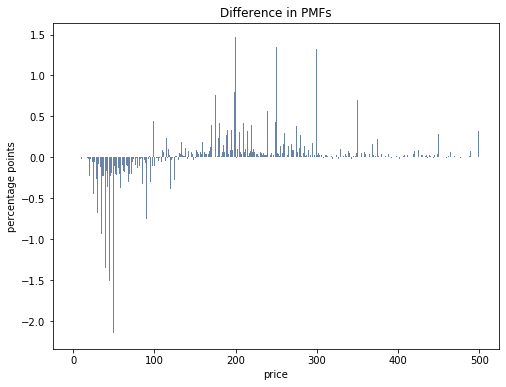

<Figure size 576x432 with 0 Axes>

In [20]:
# Compare Manhattan to Brooklyn

#The plots below show that the distribution for Manhattan airbnb prices are shifted to the right. 
#Generally airbnbs are more expensive in Manhattan compared to Brooklyn.

MakeFigures(MHN, BRK)

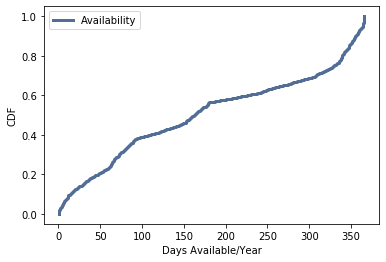

<Figure size 576x432 with 0 Axes>

In [21]:
#CDF of Availability

#The CDF plot belows shows that the data is evenly distributed and not 
# a bell curve. The Days Available/Year may not be a very good predictor
# when predicting price

cdf_Avl = thinkstats2.Cdf(NYC_DC.availability_365, label='Availability')
thinkplot.Cdf(cdf_Avl) 
thinkplot.Show(xlabel='Days Available/Year', ylabel='CDF')



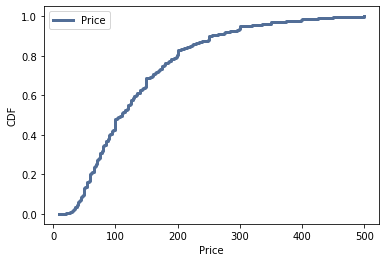

<Figure size 576x432 with 0 Axes>

In [22]:
#CDF for Price

#The graph below shows that the price is skewed to the right and the mode is far to the left. 
# This helps answer the question because there is more data for the lower prices which may mean they are more likely to be acurately predicted. 

cdf_Price = thinkstats2.Cdf(NYC_DC.price, label='Price')
thinkplot.Cdf(cdf_Price) 
thinkplot.Show(xlabel='Price', ylabel='CDF')


In [23]:
#log scale of price

def MakeNormalModel(price):
    cdf = thinkstats2.Cdf(price, label='Price')

    mean, var = thinkstats2.TrimmedMeanVar(price)
    std = np.sqrt(var)
    print('n, mean, std', len(price), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)
    

n, mean, std 29528 132.81823208238302 82.40766606312275


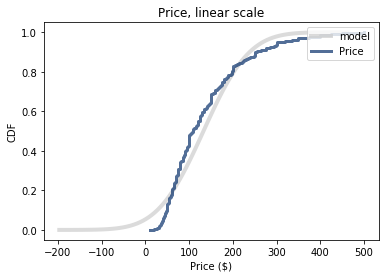

In [24]:
#linear Scale of Price Plot

MakeNormalModel(NYC_DC.price)
thinkplot.Config(title='Price, linear scale', xlabel='Price ($)',
                 ylabel='CDF', loc='upper right')

n, mean, std 29528 2.0441981291543385 0.2640590302808016


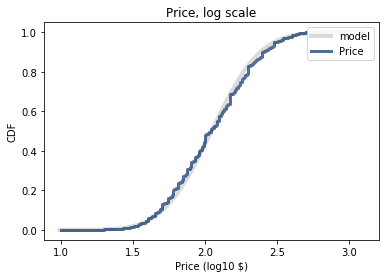

In [25]:
#Log Scale of Price Plot

# The log scale is a much better fit than the linear model. I will use this moving forward in the analysis. 

log_price = np.log10(NYC_DC.price)
MakeNormalModel(log_price)
thinkplot.Config(title='Price, log scale', xlabel='Price (log10 $)',
                 ylabel='CDF', loc='upper right')

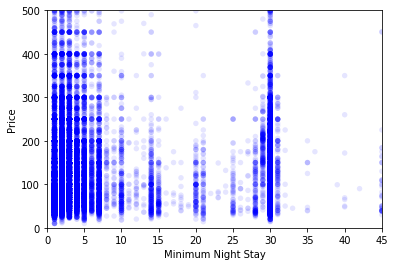

In [26]:
# Compare Variables from Scatter Plots: Price vs. Independent Variable


#Price vs. Minimum Night Stay

def ScatterPlot(minimum_nights, price, alpha=1.0):
    thinkplot.Scatter(minimum_nights, price, alpha=alpha)
    thinkplot.Config(xlabel='Minimum Night Stay',
                     ylabel='Price',
                     xlim=[0, 45],
                     ylim=[0, 500],
                     legend= False)
    
ScatterPlot(NYC_DC.minimum_nights, NYC_DC.price, alpha=0.1)


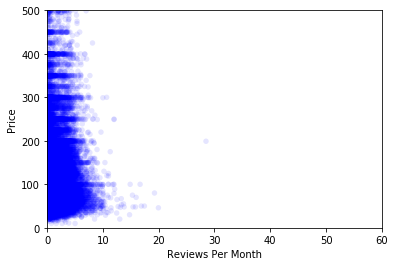

In [27]:
#Price vs. Neighbourhood_Group

def ScatterPlot(reviews_per_month, price, alpha=1.0):
    thinkplot.Scatter(reviews_per_month, price, alpha=alpha)
    thinkplot.Config(xlabel='Reviews Per Month',
                     ylabel='Price',
                     xlim=[0, 60],
                     ylim=[0, 500],
                     legend= False)
    
ScatterPlot(NYC_DC.reviews_per_month, NYC_DC.price, alpha=0.1)

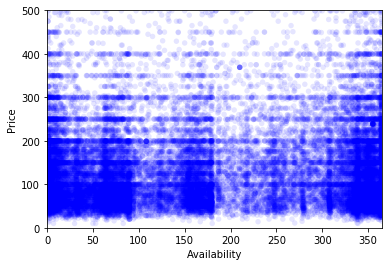

In [28]:
#Price vs. Neighbourhood_Group

def ScatterPlot(availability_365, price, alpha=1.0):
    thinkplot.Scatter(availability_365, price, alpha=alpha)
    thinkplot.Config(xlabel='Availability',
                     ylabel='Price',
                     xlim=[0, 365],
                     ylim=[0, 500],
                     legend= False)
    
ScatterPlot(NYC_DC.availability_365, NYC_DC.price, alpha=0.1)

In [29]:
# Checking for Covariance

#Price and Minimum Night Stay

def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov


NYC_DC1 = NYC_DC.dropna(subset=['price', 'minimum_nights', 'reviews_per_month'])
price, min_night, RPM = NYC_DC1.price, NYC_DC1.minimum_nights, NYC_DC1.reviews_per_month


print('Covariance of Price and Minimum Night Stay: ', Cov(price, min_night))

print('Covariance of Price and Reviews Per Month: ', Cov(price, RPM))



Covariance of Price and Minimum Night Stay:  30.731033372543965
Covariance of Price and Reviews Per Month:  -10.411649750994274


In [30]:
#Correlation
# Since the correlation is close to 0, the relationship between price and minimum nigh stay and 
#price and reviews per month is likely non-linear. 


def PCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='pearson')

print('Correlation of Price and Minimum Night Stay: ', PCorr(price, min_night))

print('Correlation of Price and Reviews Per Month: ', PCorr(price, RPM))


Correlation of Price and Minimum Night Stay:  0.04132002631088489
Correlation of Price and Reviews Per Month:  -0.06868245904126818


In [67]:
#Hypothesis Testing: Is the mean of price/night in Manhattan higher than the mean of price/night in Brooklyn
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import random

import thinkstats2
import thinkplot

class DiffMeansOneSided(DiffMeansPermute):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = group1.mean() - group2.mean()
        return test_stat


In [68]:
# Create data sets
MHN = NYC_DC[NYC_DC.neighbourhood_group == "Manhattan"]

BRK = NYC_DC[NYC_DC.neighbourhood_group == "Brooklyn"]

data = MHN.price.values, BRK.price.values


In [69]:
#Calculate P-Value of Hypothesis
#Since the P-values is so small the null hypothesis is rejected and it is believed that Manhattan's price/night 
#is higher than Brooklyn's price/night.


ht = DiffMeansOneSided(data)
pvalue = ht.PValue()
pvalue

0.0

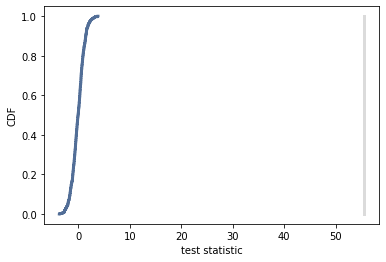

In [70]:
#Distribution of the difference in means
ht.PlotCdf()
thinkplot.Config(xlabel='test statistic',
                   ylabel='CDF')

In [71]:
# Multiple Regression

import statsmodels.formula.api as smf

#All variables
formula = 'NYC_DC.price ~ NYC_DC.neighbourhood + NYC_DC.room_type + NYC_DC.neighbourhood_group + NYC_DC.minimum_nights + NYC_DC.reviews_per_month + NYC_DC.availability_365'
model = smf.ols(formula, data=NYC_DC)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           NYC_DC.price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     106.3
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        20:32:12   Log-Likelihood:            -1.3717e+05
No. Observations:               24790   AIC:                         2.748e+05
Df Residuals:                   24566   BIC:                         2.766e+05
Df Model:                         223                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                           138.8551     10.921     12.715      0.000     117.450     160.260
NYC_DC.neighbourhood[T.Arden Heights]               -49.9633     42.817     -1.167      0.243    -133.888      33.961
NYC_DC.neighbourhood[T.Arrochar]                     14.5060     16.166      0.897      0.370     -17.181      46.193
NYC_DC.neighbourhood[T.Arverne]                      11.1739      8.002      1.396      0.163      -4.510      26.858
NYC_DC.neighbourhood[T.Astoria]                       6.1248      3.701      1.655      0.098      -1.129      13.379
NYC_DC.neighbourhood[T.Bath Beach]                  -17.0386     12.963     -1.314      0.189     -42.446       8.369
NYC_DC.neighbourhood[T.Battery Park City]            -2.7489     14.992     -0.183      0.855     -32.135      26.637
NYC_DC.neighbourhood[T.Bay Ridge]                   -15.5504      6.435     -2.416      0.016     -28.164      -2.937
NYC_DC.neighbourhood[T.Bay Terrace]                   6.5638     34.892      0.188      0.851     -61.827      74.954
NYC_DC.neighbourhood[T.Baychester]                  -20.2498     27.358     -0.740      0.459     -73.873      33.374
NYC_DC.neighbourhood[T.Bayside]                       8.9785     11.833      0.759      0.448     -14.215      32.172
NYC_DC.neighbourhood[T.Bayswater]                     6.9131     18.329      0.377      0.706     -29.013      42.839
NYC_DC.neighbourhood[T.Bedford-Stuyvesant]           -7.2612      2.204     -3.294      0.001     -11.582      -2.940
NYC_DC.neighbourhood[T.Belle Harbor]                 26.8234     30.240      0.887      0.375     -32.449      86.096
NYC_DC.neighbourhood[T.Bellerose]                    10.4914     18.333      0.572      0.567     -25.442      46.425
NYC_DC.neighbourhood[T.Belmont]                      17.6261     18.832      0.936      0.349     -19.287      54.539
NYC_DC.neighbourhood[T.Bensonhurst]                 -29.7837      8.388     -3.551      0.000     -46.225     -13.343
NYC_DC.neighbourhood[T.Bergen Beach]                -57.5927     18.245     -3.157      0.002     -93.353     -21.832
NYC_DC.neighbourhood[T.Boerum Hill]                  45.4340      7.139      6.364      0.000      31.442      59.426
NYC_DC.neighbourhood[T.Borough Park]                -25.0111      6.185     -4.044      0.000     -37.134     -12.888
NYC_DC.neighbourhood[T.Breezy Point]                125.0922     42.707      2.929      0.003      41.385     208.800
NYC_DC.neighbourhood[T.Briarwood]                   -11.4083     10.604     -1.076      0.282     -32.192       9.376
NYC_DC.neighbourhood[T.Brighton Beach]              -14.5920      8.789     -1.660      0.097     -31.819       2.636
NYC_DC.neighbou

In [73]:
#Removed Neighborhood Group

formula_1 = 'NYC_DC.price ~ NYC_DC.neighbourhood + NYC_DC.room_type + NYC_DC.minimum_nights + NYC_DC.reviews_per_month + NYC_DC.availability_365'
model_1 = smf.ols(formula_1, data=NYC_DC)
results_1 = model_1.fit()
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           NYC_DC.price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     106.3
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        20:32:27   Log-Likelihood:            -1.3717e+05
No. Observations:               24790   AIC:                         2.748e+05
Df Residuals:                   24566   BIC:                         2.766e+05
Df Model:                         223                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                           138.8551     10.921     12.715      0.000     117.450     160.260
NYC_DC.neighbourhood[T.Arden Heights]               -66.3079     44.828     -1.479      0.139    -154.174      21.558
NYC_DC.neighbourhood[T.Arrochar]                     -1.8386     18.832     -0.098      0.922     -38.751      35.074
NYC_DC.neighbourhood[T.Arverne]                      23.8094     13.389      1.778      0.075      -2.433      50.052
NYC_DC.neighbourhood[T.Astoria]                      18.7604     11.264      1.665      0.096      -3.318      40.839
NYC_DC.neighbourhood[T.Bath Beach]                    3.8440     17.031      0.226      0.821     -29.539      37.227
NYC_DC.neighbourhood[T.Battery Park City]            68.1559     18.854      3.615      0.000      31.200     105.112
NYC_DC.neighbourhood[T.Bay Ridge]                     5.3323     12.573      0.424      0.671     -19.311      29.975
NYC_DC.neighbourhood[T.Bay Terrace]                  19.1993     37.132      0.517      0.605     -53.581      91.980
NYC_DC.neighbourhood[T.Baychester]                  -20.2498     27.358     -0.740      0.459     -73.873      33.374
NYC_DC.neighbourhood[T.Bayside]                      21.6140     16.070      1.345      0.179      -9.885      53.113
NYC_DC.neighbourhood[T.Bayswater]                    19.5486     21.494      0.909      0.363     -22.582      61.679
NYC_DC.neighbourhood[T.Bedford-Stuyvesant]           13.6215     10.951      1.244      0.214      -7.843      35.086
NYC_DC.neighbourhood[T.Belle Harbor]                 39.4589     32.615      1.210      0.226     -24.468     103.386
NYC_DC.neighbourhood[T.Bellerose]                    23.1269     21.497      1.076      0.282     -19.008      65.262
NYC_DC.neighbourhood[T.Belmont]                      17.6261     18.832      0.936      0.349     -19.287      54.539
NYC_DC.neighbourhood[T.Bensonhurst]                  -8.9010     13.721     -0.649      0.517     -35.794      17.992
NYC_DC.neighbourhood[T.Bergen Beach]                -36.7100     21.501     -1.707      0.088     -78.854       5.434
NYC_DC.neighbourhood[T.Boerum Hill]                  66.3167     12.969      5.113      0.000      40.896      91.738
NYC_DC.neighbourhood[T.Borough Park]                 -4.1284     12.437     -0.332      0.740     -28.507      20.250
NYC_DC.neighbourhood[T.Breezy Point]                137.7277     44.826      3.073      0.002      49.867     225.588
NYC_DC.neighbourhood[T.Briarwood]                     1.2272     15.151      0.081      0.935     -28.471      30.925
NYC_DC.neighbourhood[T.Brighton Beach]                6.2907     13.981      0.450      0.653     -21.113      33.695
NYC_DC.neighbou

In [75]:
#Removed minimum nights

formula_2 = 'NYC_DC.price ~ NYC_DC.neighbourhood + NYC_DC.room_type + NYC_DC.reviews_per_month + NYC_DC.availability_365'
model_2 = smf.ols(formula_2, data=NYC_DC)
results_2 = model_2.fit()
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           NYC_DC.price   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     99.78
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        20:32:31   Log-Likelihood:            -1.3758e+05
No. Observations:               24790   AIC:                         2.756e+05
Df Residuals:                   24567   BIC:                         2.774e+05
Df Model:                         222                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                           132.0187     11.097     11.897      0.000     110.268     153.769
NYC_DC.neighbourhood[T.Arden Heights]               -67.0990     45.563     -1.473      0.141    -156.406      22.208
NYC_DC.neighbourhood[T.Arrochar]                     -7.8462     19.140     -0.410      0.682     -45.362      29.669
NYC_DC.neighbourhood[T.Arverne]                      23.8063     13.608      1.749      0.080      -2.867      50.479
NYC_DC.neighbourhood[T.Astoria]                      14.5363     11.448      1.270      0.204      -7.902      36.975
NYC_DC.neighbourhood[T.Bath Beach]                    3.3899     17.311      0.196      0.845     -30.540      37.320
NYC_DC.neighbourhood[T.Battery Park City]            62.2084     19.162      3.246      0.001      24.649      99.768
NYC_DC.neighbourhood[T.Bay Ridge]                    -0.1051     12.777     -0.008      0.993     -25.149      24.939
NYC_DC.neighbourhood[T.Bay Terrace]                  20.6749     37.740      0.548      0.584     -53.299      94.649
NYC_DC.neighbourhood[T.Baychester]                  -20.0178     27.807     -0.720      0.472     -74.521      34.485
NYC_DC.neighbourhood[T.Bayside]                      19.7676     16.334      1.210      0.226     -12.247      51.783
NYC_DC.neighbourhood[T.Bayswater]                    13.2783     21.846      0.608      0.543     -29.541      56.097
NYC_DC.neighbourhood[T.Bedford-Stuyvesant]           10.1943     11.130      0.916      0.360     -11.621      32.010
NYC_DC.neighbourhood[T.Belle Harbor]                 41.5547     33.149      1.254      0.210     -23.420     106.529
NYC_DC.neighbourhood[T.Bellerose]                    23.6293     21.849      1.081      0.280     -19.197      66.456
NYC_DC.neighbourhood[T.Belmont]                      17.6089     19.141      0.920      0.358     -19.909      55.127
NYC_DC.neighbourhood[T.Bensonhurst]                 -11.8618     13.945     -0.851      0.395     -39.195      15.472
NYC_DC.neighbourhood[T.Bergen Beach]                -37.4815     21.854     -1.715      0.086     -80.317       5.354
NYC_DC.neighbourhood[T.Boerum Hill]                  61.2511     13.181      4.647      0.000      35.416      87.086
NYC_DC.neighbourhood[T.Borough Park]                 -3.6636     12.641     -0.290      0.772     -28.441      21.114
NYC_DC.neighbourhood[T.Breezy Point]                141.5552     45.560      3.107      0.002      52.254     230.856
NYC_DC.neighbourhood[T.Briarwood]                     2.8221     15.400      0.183      0.855     -27.362      33.007
NYC_DC.neighbourhood[T.Brighton Beach]                3.5319     14.210      0.249      0.804     -24.321      31.384
NYC_DC.neighbou

In [76]:
#Removed Reviews per month and availability

formula_3 = 'NYC_DC.price ~ NYC_DC.neighbourhood + NYC_DC.room_type'
model_3 = smf.ols(formula_3, data=NYC_DC)
results_3 = model_3.fit()
results_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           NYC_DC.price   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     115.0
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        20:32:35   Log-Likelihood:            -1.6519e+05
No. Observations:               29528   AIC:                         3.308e+05
Df Residuals:                   29306   BIC:                         3.327e+05
Df Model:                         221                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                           139.8403     11.383     12.285      0.000     117.529     162.152
NYC_DC.neighbourhood[T.Arden Heights]               -60.8403     39.386     -1.545      0.122    -138.039      16.359
NYC_DC.neighbourhood[T.Arrochar]                     -9.5950     19.137     -0.501      0.616     -47.104      27.914
NYC_DC.neighbourhood[T.Arverne]                      20.6513     13.962      1.479      0.139      -6.715      48.017
NYC_DC.neighbourhood[T.Astoria]                      14.4270     11.749      1.228      0.219      -8.602      37.456
NYC_DC.neighbourhood[T.Bath Beach]                    3.7778     17.316      0.218      0.827     -30.163      37.718
NYC_DC.neighbourhood[T.Battery Park City]            45.0195     16.810      2.678      0.007      12.070      77.969
NYC_DC.neighbourhood[T.Bay Ridge]                    -0.8700     13.065     -0.067      0.947     -26.478      24.738
NYC_DC.neighbourhood[T.Bay Terrace]                  21.0794     39.382      0.535      0.592     -56.111      98.270
NYC_DC.neighbourhood[T.Baychester]                  -14.8531     25.737     -0.577      0.564     -65.298      35.592
NYC_DC.neighbourhood[T.Bayside]                      14.1824     15.274      0.929      0.353     -15.756      44.121
NYC_DC.neighbourhood[T.Bayswater]                    14.6944     22.015      0.667      0.504     -28.457      57.845
NYC_DC.neighbourhood[T.Bedford-Stuyvesant]           10.7288     11.443      0.938      0.348     -11.701      33.159
NYC_DC.neighbourhood[T.Belle Harbor]                 41.2546     34.578      1.193      0.233     -26.520     109.030
NYC_DC.neighbourhood[T.Bellerose]                    20.2764     21.388      0.948      0.343     -21.644      62.197
NYC_DC.neighbourhood[T.Belmont]                      15.0462     17.322      0.869      0.385     -18.906      48.999
NYC_DC.neighbourhood[T.Bensonhurst]                 -10.9264     14.157     -0.772      0.440     -38.674      16.821
NYC_DC.neighbourhood[T.Bergen Beach]                -23.2691     19.900     -1.169      0.242     -62.273      15.735
NYC_DC.neighbourhood[T.Boerum Hill]                  64.7845     13.447      4.818      0.000      38.427      91.142
NYC_DC.neighbourhood[T.Borough Park]                 -3.2851     12.841     -0.256      0.798     -28.453      21.883
NYC_DC.neighbourhood[T.Breezy Point]                157.8726     39.383      4.009      0.000      80.681     235.065
NYC_DC.neighbourhood[T.Briarwood]                     8.9218     15.283      0.584      0.559     -21.034      38.877
NYC_DC.neighbourhood[T.Brighton Beach]                6.3625     14.383      0.442      0.658     -21.828      34.553
NYC_DC.neighbou